<h1> Import necessary libraries </h1>

#Turn in a Jupyter Notebook, in which you:

·Ingest your team’s data set (from .csv or a saved set of objects from a previous Python session)

·Run a linear OLS regression using a continuous variable as the dependent variable and 2-5 other variables as independent variables. Convert variables to the required form as needed.

·Run a logistic regression using a binary variable as the dependent variable and 2-5 other variables as independent variables. Convert variables to the required form as needed. Convert the log odds coefficients to marginal effects.

·Include as #comments in a cell in your notebook your group’s answers to the following questions for each regression: Which results are statistically significant? 

In [34]:
import pandas as pd 
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

print("Finished!")

Finished!


<h1> Ingesting data </h1>

In [35]:
# Read in data and create data frame; call it "reviews"
reviews = pd.read_csv("airbnb_nyc_trimmed.csv")
reviews

,id,name,description,host_name,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighborhood,neighborhood_detail,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,free_parking,wifi,pets,gym,breakfast,kid_friendly
0,4951402,Best Location on the UWS!!,"Clean cozy room on the UWS, a minute walk to t...",Sasha,f,2,t,t,Manhattan,Upper West Side,...,f,flexible,f,f,f,t,t,f,f,t
1,16103920,The Executive Loft Manhattan,This wonderful apartment is located on a prime...,Francisco,f,1,t,f,Manhattan,Chelsea,...,f,strict_14_with_grace_period,f,f,f,t,f,f,f,t
2,35803621,TRANQUIL HAVEN-8 MINS TO JFK/LIRR/AIRTRAIN RM#2.,This spacious bedroom with shared bath is loca...,Sharon,f,2,t,t,Queens,Jamaica,...,f,moderate,f,f,f,t,f,f,f,f
3,12223531,Spacious and sun-drenched bedroom,Spacious and sun-drenched bedroom in Williamsb...,Mimi,f,2,t,t,Brooklyn,Williamsburg,...,f,flexible,f,f,f,t,f,f,f,f
4,34120534,"Sunlit Apartment in the ""Friends Building""",Spacious sun soaked one bedroom apartment in t...,Vaughn,f,1,t,f,West Village,West Village,...,f,flexible,f,f,t,t,t,f,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,28715332,TRIBECA/SOHO 2 BEDROOM LUXURY LOFT,TYPICAL SOHO/TRIBECA NYC LOFT Very quiet luxur...,Roberto,f,1,t,f,Manhattan,Tribeca,...,f,strict_14_with_grace_period,f,f,f,t,f,f,f,f
996,29098862,Quite room. 15 mins to JFK & 20 mins to Manhattan,Private room perfect for lone traveler or quad...,Michael,f,1,t,f,East New York,Cypress Hills,...,f,moderate,f,f,f,t,f,f,f,f
997,3819656,SoHo/Village Studio,Warm and spacious studio with lots of light an...,Russell,f,1,t,t,Manhattan,Greenwich Village,...,f,moderate,f,f,f,t,f,f,f,f
998,27529564,Queen size bedroom,Our modest home in a Classic Elevator Buildin...,Nour,f,3,t,f,Harlem,Harlem,...,f,flexible,f,f,f,t,f,f,f,f


#### Unfortunately this dataset doesn't have true continuous variable, but price even though it's rounded in this dataset can be a good continuous variable, so I will have Price as a dependent variable and now I have to look for few independent variable:
1.Borough
2.Beds (Number of Beds)
3.Bed_Type
4.Cancellation_policy
5.free_park(if the parking is free of not)

##### CSV file has too many columns making it hard to scan visually
##### Let's try to make it readbale by getting a subset
##### Can Pandas do a subset? Let me google it and find out

In [36]:
###First Let me get the list of all coulumns and then pick
reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                1000 non-null   int64  
 1   name                              1000 non-null   object 
 2   description                       988 non-null    object 
 3   host_name                         1000 non-null   object 
 4   host_is_superhost                 1000 non-null   object 
 5   host_total_listings_count         1000 non-null   int64  
 6   host_has_profile_pic              1000 non-null   object 
 7   host_identity_verified            1000 non-null   object 
 8   neighborhood                      999 non-null    object 
 9   neighborhood_detail               1000 non-null   object 
 10  borough                           1000 non-null   object 
 11  zipcode                           991 non-null    object 
 12  market 

In [47]:
#Pick what I need
airbnb_assignment4_subset = reviews[['id', 'borough' , 'beds', 'bed_type' , 'price' , 'cancellation_policy','host_is_superhost' ]]
airbnb_assignment4_subset

,id,borough,beds,bed_type,price,cancellation_policy,host_is_superhost
0,4951402,Manhattan,1.0,Real Bed,78,flexible,f
1,16103920,Manhattan,3.0,Real Bed,200,strict_14_with_grace_period,f
2,35803621,Queens,1.0,Real Bed,60,moderate,f
3,12223531,Brooklyn,1.0,Real Bed,80,flexible,f
4,34120534,Manhattan,1.0,Real Bed,500,flexible,f
...,...,...,...,...,...,...,...
995,28715332,Manhattan,2.0,Real Bed,799,strict_14_with_grace_period,f
996,29098862,Brooklyn,1.0,Real Bed,80,moderate,f
997,3819656,Manhattan,1.0,Real Bed,165,moderate,f
998,27529564,Manhattan,1.0,Real Bed,60,flexible,f


### In the above dataset beds is float and price is integer, which doesn't look goos if we are doing regression on price(dependent) .

In [48]:
#airbnb_assignment4_subset['beds']=airbnb_assignment4_subset['beds'].astype('Int64')
#airbnb_assignment4_subset['price']=airbnb_assignment4_subset['price'].astype('float64')
airbnb_assignment4_subset

,id,borough,beds,bed_type,price,cancellation_policy,host_is_superhost
0,4951402,Manhattan,1.0,Real Bed,78,flexible,f
1,16103920,Manhattan,3.0,Real Bed,200,strict_14_with_grace_period,f
2,35803621,Queens,1.0,Real Bed,60,moderate,f
3,12223531,Brooklyn,1.0,Real Bed,80,flexible,f
4,34120534,Manhattan,1.0,Real Bed,500,flexible,f
...,...,...,...,...,...,...,...
995,28715332,Manhattan,2.0,Real Bed,799,strict_14_with_grace_period,f
996,29098862,Brooklyn,1.0,Real Bed,80,moderate,f
997,3819656,Manhattan,1.0,Real Bed,165,moderate,f
998,27529564,Manhattan,1.0,Real Bed,60,flexible,f


### Above process works with working and doesn't look pretty, will figure out another way to typecast l

##### But Now my data set looks manageble.airbnb_assignment4_subset
##### Let me convert all independent variables into numerical/Categorical use dict()

In [49]:
borough_dict = {'Manhattan': 1, 'Bronx':2,'Brooklyn': 3,'Queens' : 4,'Staten Island' : 5}
bed_type_dict = {'Airbed': 1, 'Futon':2,'Pull-out Sofa': 3,'Real Bed' : 4}
cancellation_policy_dict = {'moderate': 1, 'flexible':2,'strict_14_with_grace_period': 3,'super_strict_30' : 4}
my_borough_num_col = []
my_bed_type_col = []
my_cancellation_policy_col = []

for item in airbnb_assignment4_subset.borough: 
    my_borough_num_col.append(borough_dict[item])
airbnb_assignment4_subset['borough_num']= my_borough_num_col

for item in airbnb_assignment4_subset.bed_type: 
    my_bed_type_col.append(bed_type_dict[item])
airbnb_assignment4_subset['bed_type_num']= my_bed_type_col

for item in airbnb_assignment4_subset.cancellation_policy: 
    my_cancellation_policy_col.append(cancellation_policy_dict[item])
airbnb_assignment4_subset['cancellation_policy_num']= my_cancellation_policy_col

airbnb_assignment4_subset

<ipython-input-49-5a3c42dfeffb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_assignment4_subset['borough_num']= my_borough_num_col
<ipython-input-49-5a3c42dfeffb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_assignment4_subset['bed_type_num']= my_bed_type_col
<ipython-input-49-5a3c42dfeffb>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

,id,borough,beds,bed_type,price,cancellation_policy,host_is_superhost,borough_num,bed_type_num,cancellation_policy_num
0,4951402,Manhattan,1.0,Real Bed,78,flexible,f,1,4,2
1,16103920,Manhattan,3.0,Real Bed,200,strict_14_with_grace_period,f,1,4,3
2,35803621,Queens,1.0,Real Bed,60,moderate,f,4,4,1
3,12223531,Brooklyn,1.0,Real Bed,80,flexible,f,3,4,2
4,34120534,Manhattan,1.0,Real Bed,500,flexible,f,1,4,2
...,...,...,...,...,...,...,...,...,...,...
995,28715332,Manhattan,2.0,Real Bed,799,strict_14_with_grace_period,f,1,4,3
996,29098862,Brooklyn,1.0,Real Bed,80,moderate,f,3,4,1
997,3819656,Manhattan,1.0,Real Bed,165,moderate,f,1,4,1
998,27529564,Manhattan,1.0,Real Bed,60,flexible,f,1,4,2


In [ ]:
# Choose your dependent variable (y) 
# Must be continuous for a linear regression
# We'll use price

In [53]:
# Run a linear regression using your "y" and "x's" and print output
# Note that C() tells Python to treat those variables as categorical
# Note also that Python omits one value from the output
linear = ols('price ~ C(bed_type) + C(borough) +C(beds)+C(cancellation_policy)', data = airbnb_assignment4_subset).fit() 

linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     24.86
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           1.39e-73
Time:                        21:27:37   Log-Likelihood:                -6040.1
No. Observations:                 999   AIC:                         1.212e+04
Df Residuals:                     978   BIC:                         1.223e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                              -110.0888     68.979     -1.596      0.111    -245.452      25.274
C(bed_type)[T.Futon]                                    124.5506     69.009      1.805      0.071     -10.872     259.973
C(bed_type)[T.Pull-out Sofa]                            129.4883     72.317      1.791      0.074     -12.426     271.403
C(bed_type)[T.Real Bed]                                 136.8386     60.837      2.249      0.025      17.453     256.225
C(borough)[T.Brooklyn]                                   67.5118     21.863      3.088      0.002      24.608     110.415
C(borough)[T.Manhattan]                                 129.0983     21.873      5.902      0.000      86.176     172.021
C(borough)[T.Queens]                                     44.5463     23.340      1.909      0.057      -1.256      90.348
C(borough)[T.Staten Island]                              -6.7252     39.975     -0.168      0.866     -85.171      71.721
C(beds)[T.1.0]                                          -19.7659     25.580     -0.773      0.440     -69.964      30.432
C(beds)[T.2.0]                                           28.5497     26.214      1.089      0.276     -22.892      79.991
C(beds)[T.3.0]                                           95.2875     28.043      3.398      0.001      40.255     150.319
C(beds)[T.4.0]                                          208.1040     32.136      6.476      0.000     145.041     271.167
C(beds)[T.5.0]                                          339.1388     41.992      8.076      0.000     256.734     421.544
C(beds)[T.6.0]                                          197.3632     49.241      4.008      0.000     100.732     293.994
C(beds)[T.7.0]                                          310.3869    106.872      2.904      0.004     100.662     520.112
C(beds)[T.9.0]                                          366.1511     79.205      4.623      0.000     210.720     521.582
C(beds)[T.10.0]                                          37.4214    106.512      0.351      0.725    -171.597     246.440
C(beds)[T.13.0]                                         -13.5786    106.512     -0.127      0.899    -222.597     195.440
C(cancellation_policy)[T.moderate]                        9.0945      9.368      0.971      0.332      -9.289      27.478
C(cancellation_policy)[T.strict_14_with_grace_period]    18.3170      8.230      2.226      0.026       2.167      34.467
C(cancellation_policy)[T.super_strict_30]               222.9178    103.638      2.151      0.032      19.539     426.297
==============================================================================
Omnibus:                     1018.926   Durbin-Watson:                   2.0

### Interprestation of above results.

    1.R-squared:0.337 This values is far from 1, so the relatioship the 4 categorical variables and price is high
    2. Another observation that it is omitting one categorry from each categorical variable in result
    
        -bed_type it skipped - Airbed
        -burough it skipped - Bronx
        -Cancellation Policy it skipped - Flexible
        -beds it skipped zero
    
    -- Reason Not sure but my guess is that it omitted the smallest group from each category  (sampling K-1)

In [51]:
# Print out all column names
for col in airbnb_assignment4_subset.columns: 
    print(col) 

id
borough
beds
bed_type
price
cancellation_policy
host_is_superhost
borough_num
bed_type_num
cancellation_policy_num


##### p-value smaller the better and R-squared higher the better.
#### Let's try to look some of the parameter indiviully

    #1.boroug_num


In [52]:
# What about the relationship between likes and score?  Treat score as continuous.
# Re-run your regression with score as your x 
linear_score = ols('price ~ borough', data = airbnb_assignment4_subset).fit() 

linear_score.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     22.42
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           9.61e-18
Time:                        21:20:51   Log-Likelihood:                -6208.3
No. Observations:                1000   AIC:                         1.243e+04
Df Residuals:                     995   BIC:                         1.245e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   68.9583     24.603      2.803      0.005      20.678     117.238
borough[T.Brooklyn]         47.9883     25.279      1.898      0.058      -1.618      97.594
borough[T.Manhattan]       109.4121     25.308      4.323      0.000      59.749     159.075
borough[T.Queens]           18.4515     26.915      0.686      0.493     -34.364      71.267
borough[T.Staten Island]    34.2417     45.366      0.755      0.451     -54.783     123.266
==============================================================================
Omnibus:                      987.920   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50330.958
Skew:                           4.583   Prob(JB):                         0.00
Kurtosis:                      36.525   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    #2.cancellation_policy


In [70]:
# What about the relationship between likes and score?  Treat score as continuous.
# Re-run your regression with score as your x 
linear_score = ols('price ~ C(cancellation_policy)', data = airbnb_assignment4_subset).fit() 

linear_score.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     8.421
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           1.57e-05
Time:                        21:43:12   Log-Likelihood:                -6239.0
No. Observations:                1000   AIC:                         1.249e+04
Df Residuals:                     996   BIC:                         1.251e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               106.1235      7.968     13.318      0.000      90.487     121.760
C(cancellation_policy)[T.moderate]                       32.1812     11.125      2.893      0.004      10.350      54.012
C(cancellation_policy)[T.strict_14_with_grace_period]    45.6145      9.714      4.696      0.000      26.553      64.676
C(cancellation_policy)[T.super_strict_30]               252.8765    124.471      2.032      0.042       8.622     497.131
==============================================================================
Omnibus:                      976.831   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47907.822
Skew:                           4.512   Prob(JB):                         0.00
Kurtosis:                      35.686   Cond. No.                         36.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Staistically out of 4 x variables beds is the most staistically significant variable
#3. Beds

In [69]:
linear_score = ols('price ~ beds', data = airbnb_assignment4_subset).fit() 

linear_score.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     209.9
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           2.66e-43
Time:                        21:42:48   Log-Likelihood:                -6150.0
No. Observations:                 999   AIC:                         1.230e+04
Df Residuals:                     997   BIC:                         1.231e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.9609      6.289     10.012      0.000      50.620      75.302
beds          48.3003      3.334     14.486      0.000      41.757      54.843
==============================================================================
Omnibus:                      936.701   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52528.466
Skew:                           4.148   Prob(JB):                         0.00
Kurtosis:                      37.542   Cond. No.                         3.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='borough_num', ylabel='price'>

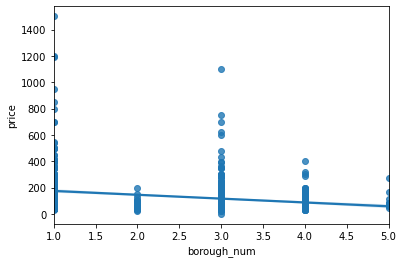

In [61]:
# Generate a regression plot to see what's happening
# [doesn't look as nice with categorical-ish x's]

sns.regplot(x = 'borough_num', y = 'price', data = airbnb_assignment4_subset)

<h1> Logistic regression </h1>

# Choose your dependent variable (y) 
# Must be a categorial binary/binomial variable for a logistic regression
# Let's use host_is_superhost for that

In [66]:
# Converting categorical text to categorical numbers; use 0/1 this time 
# Create a dictionary
host_is_superhost_dict = {'f': 1,'t': 0} 
airbnb_assignment4_subset['host_is_superhost_num'] = [host_is_superhost_dict[item] for item in airbnb_assignment4_subset.host_is_superhost]
airbnb_assignment4_subset

<ipython-input-66-2fd48db5e905>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_assignment4_subset['host_is_superhost_num'] = [host_is_superhost_dict[item] for item in airbnb_assignment4_subset.host_is_superhost]


,id,borough,beds,bed_type,price,cancellation_policy,host_is_superhost,borough_num,bed_type_num,cancellation_policy_num,host_is_superhost_num
0,4951402,Manhattan,1.0,Real Bed,78,flexible,f,1,4,2,1
1,16103920,Manhattan,3.0,Real Bed,200,strict_14_with_grace_period,f,1,4,3,1
2,35803621,Queens,1.0,Real Bed,60,moderate,f,4,4,1,1
3,12223531,Brooklyn,1.0,Real Bed,80,flexible,f,3,4,2,1
4,34120534,Manhattan,1.0,Real Bed,500,flexible,f,1,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...
995,28715332,Manhattan,2.0,Real Bed,799,strict_14_with_grace_period,f,1,4,3,1
996,29098862,Brooklyn,1.0,Real Bed,80,moderate,f,3,4,1,1
997,3819656,Manhattan,1.0,Real Bed,165,moderate,f,1,4,1,1
998,27529564,Manhattan,1.0,Real Bed,60,flexible,f,1,4,2,1


In [67]:
# Run the regression
logit = sm.logit('host_is_superhost_num ~ price', data=airbnb_assignment4_subset).fit()  
logit.summary()

Optimization terminated successfully.
         Current function value: 0.547442
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     host_is_superhost_num   No. Observations:                 1000
Model:                             Logit   Df Residuals:                      998
Method:                              MLE   Df Model:                            1
Date:                   Tue, 21 Sep 2021   Pseudo R-squ.:               0.0002831
Time:                           21:40:22   Log-Likelihood:                -547.44
converged:                          True   LL-Null:                       -547.60
Covariance Type:               nonrobust   LLR p-value:                    0.5777
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1227      0.112      9.999      0.000       0.903       1.343
price          0.0003      0.001      0.547      0.585      -0.001       0.002
==============================================================================
"""

In [68]:
# Calculate marginal effects instead of log odds for the coefficients
logit.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
         Logit Marginal Effects         
========================================
Dep. Variable:     host_is_superhost_num
Method:                             dydx
At:                              overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
price       6.176e-05      0.000      0.547      0.585      -0.000       0.000
==============================================================================
"""